In [10]:
import numpy as np
from scipy.integrate import cumtrapz
from scipy.interpolate import interp1d
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# Make an arbitrary function, here N gaussians with randomly chosen parameters
N = 100
function_domain = np.linspace(-15,15,3001)
function_output = np.zeros(function_domain.shape)
for ii in range(N):
    sigma = np.random.uniform(0.2,2)
    mean = np.random.uniform(-10, 10)
    temp_dist = norm(loc=mean, scale=sigma)
    temp_pdf_values = temp_dist.pdf(function_domain)
    function_output += temp_pdf_values

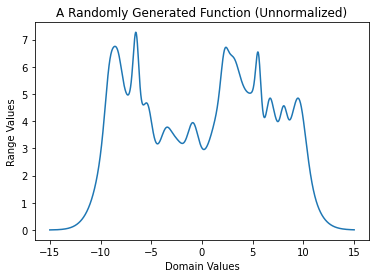

In [12]:
# Plot for reference
plt.plot(function_domain, function_output)
plt.xlabel("Domain Values")
plt.ylabel("Range Values")
plt.title("A Randomly Generated Function (Unnormalized)")
plt.show()

In [16]:
# Function Definitions 
def get_cdf(xvalues, yvalues, normalized=True):
    cum_int = cumtrapz(yvalues, x=xvalues)
    cdf = np.zeros(xvalues.shape)
    if not normalized:
        normalizing_constant = cum_int[-1]
    else:
        normalizing_constant = 1
    cdf[1:] = cum_int / normalizing_constant
    return cdf, normalizing_constant

def interp_inv_cdf(xvalues, cdf):
    return interp1d(cdf, xvalues)

def sample_from_arbitrary_distribution(xvalues, yvalues, N, normalized=True):
    cdf, _ = get_cdf(xvalues, yvalues, normalized=normalized)
    inv_cdf_interp = interp_inv_cdf(xvalues, cdf)
    samples = np.random.uniform(size=N)
    mapped_samples = inv_cdf_interp(samples)
    return mapped_samples

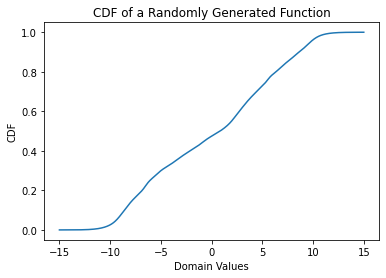

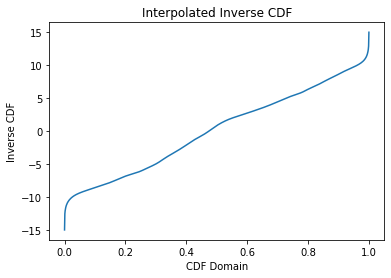

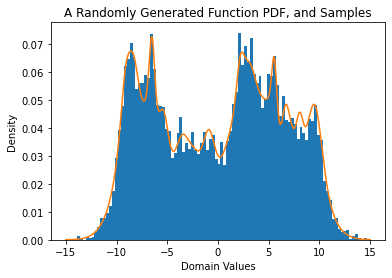

In [18]:
# Example Plots

cdf, normalizing_constant = get_cdf(function_domain, function_output, normalized=False)
plt.plot(function_domain, cdf)
plt.xlabel("Domain Values")
plt.ylabel("CDF")
plt.title("CDF of a Randomly Generated Function")
plt.show()

inv_cdf_interp = interp_inv_cdf(function_domain, cdf)
inv_cdf_domain = np.linspace(0,1,1001)
inv_cdf_sample_values = inv_cdf_interp(inv_cdf_domain)
plt.plot(inv_cdf_domain, inv_cdf_sample_values)
plt.xlabel("CDF Domain")
plt.ylabel("Inverse CDF")
plt.title("Interpolated Inverse CDF")
plt.show()

num_samples = 10000
mapped_sampling = sample_from_arbitrary_distribution(function_domain, function_output, num_samples, normalized=False)
plt.hist(mapped_sampling, density=True, bins=100, label="Transformed Samples")
function_pdf = function_output / normalizing_constant
plt.plot(function_domain, function_pdf, label="Normalized PDF of Function")
plt.xlabel("Domain Values")
plt.ylabel("Density")
plt.title("A Randomly Generated Function PDF, and Samples")
plt.show()